 # **Neural Network Classification**

classification is a problem o fpredicting wether something is one thing or another 

(there can be multiple things as the options).

## 1. Make classification data and get it ready

In [214]:
import torch 
import torch.nn as nn

In [215]:
# Importing dataset
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [216]:
print(f"FIrst 10 samples of `x`:\n{x[:10]}\n")
print(f"First 10 samples of `y`:\n{y[:10]}")

FIrst 10 samples of `x`:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]

First 10 samples of `y`:
[1 1 1 1 0 1 1 1 1 0]


In [217]:
# make dtatframe of circle data
import pandas as pd
circles = pd.DataFrame({"x1": x[:,0],
                        "x2": x[:,1],
                        "lable": y})

circles.head(10)

,x1,x2,lable
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [218]:
 # Check different labels
#circles.label.value_counts()

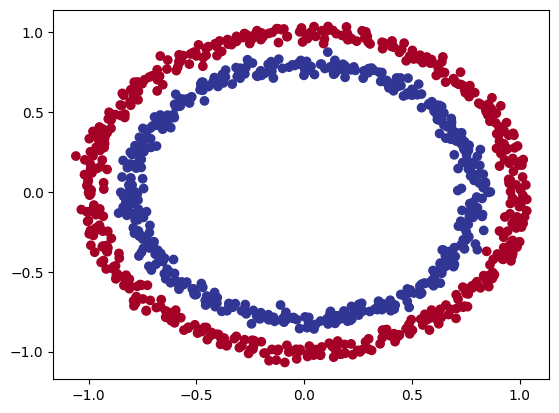

In [219]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=x[:, 0], 
            y=x[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

### 1.1 Input and output shapes

In [220]:
# Check the shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

**Note**  
* the data we're working is ofent referred as a toy dataset, a dataset that is samll enough to experiments and practice the fundamentals.

Let's find out how we could build a PyTorch neural network to classify dots into red (0) or blue (1).

> **Note:** This dataset is often what's considered a **toy problem** (a problem that's used to try and test things out on) in machine learning. 
> 
> But it represents the major key of classification, you have some kind of data represented as numerical values and you'd like to build a model that's able to classify it, in our case, separate it into red or blue dots.

In [221]:
# View the first example of features and labels
x_sample = x[0]
y_sample = y[0]
print(f"Values for one sample of X: {x_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {x_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [222]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
x[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [223]:
type(x), x.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [224]:
torch.manual_seed(5)

In [225]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

let's build a model to classify our blue and red dots.

to do so, we want to:

1. Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
2. Constructing a model by subclassing `nn.Module`.
3. Defining a loss function and optimizer.
4. Creating a training loop (this'll be in the next section).

In [226]:
# Standard PyTorch imports
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we're setup device agnostic, lets create mdoel that:

Let's create a model class that:
1. Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).
2. Creates 2 `nn.Linear` layers in the constructor capable of handling the input and output shapes of `X` and `y`.
3. Defines a `forward()` method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target `device`. 

In [227]:
# 1. Constusct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.linear layers capavble of handling x and y inputs and outputs shape
        self.layer_1 = nn.Linear(in_features = 2, out_features = 5) # takes in 2 features and goes out 5 features (5 neurons in the hidden layer)
        self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # takes in 5 features and goes out 1 feature (y) (1 neuron in the output layer)

    # 3. Define a forward() method that runs the model
    def forward(self, x):
        # Return the linear combination of the inputs and weights
        return self.layer_2(self.layer_1(x))# (x->layer_1->layer_2-> output(y))computaion goes therough layer_1  first then the out of layer_1 goes through layer_2

#4. create an instance of the model and send it to target device
model_0= CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

![A visual example of what a classification neural network with linear activation looks like on the tensorflow playground](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-linear-activation.png)
*A visual example of what a similar classificiation neural network to the one we've just built looks like. Try create one of your own on the [TensorFlow Playground website](https://playground.tensorflow.org/).*

You can also do the same as above using [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html).

`nn.Sequential` performs a forward pass computation of the input data through the layers in the order they appear.

In [228]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [229]:
device

'cuda'

In [230]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3373, -0.6495],
                      [ 0.4031,  0.6720],
                      [-0.5793,  0.0386],
                      [ 0.2537, -0.3339],
                      [-0.1547, -0.4722]], device='cuda:0')),
             ('0.bias',
              tensor([-0.3343, -0.6446, -0.0164,  0.4193,  0.3439], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.4201, -0.3928, -0.0550,  0.4354,  0.0732]], device='cuda:0')),
             ('1.bias', tensor([-0.1261], device='cuda:0'))])

In [231]:
#make predictions
with torch.inference_mode():
    untrained_preds = model_0(x_test.to(device))
print(f"lenth of predictions:{len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"length of test samples: {len(x_test)}, shape: {x_test.shape}")
print(f"\nfirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nfirst 10 labels:\n{y_test[:10]}")

lenth of predictions:200, shape: torch.Size([200, 1])
length of test samples: 200, shape: torch.Size([200, 2])

first 10 predictions:
tensor([[-0.2321],
        [-0.4975],
        [ 0.5403],
        [-0.4512],
        [ 0.6619],
        [ 0.4990],
        [-0.3448],
        [-0.1111],
        [ 0.5340],
        [-0.5139]], device='cuda:0')

first 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer
We've setup a loss (also called a criterion or cost function)

But different problem types require different loss functions. 

For example, for a regression problem (predicting a number) you might used mean absolute error (MAE) loss.

And for a binary classification problem (like ours), you'll often use [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) as the loss function.

For example, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`) can be used for a range of problems, and the same applies to the Adam optimizer (`torch.optim.Adam()`). 

| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Mutli-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) | 
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |  



PyTorch has two binary cross entropy implementations:
1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - This is the same as above except it has a sigmoid layer ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) built-in (we'll see what this means soon).

Which one should you use? 

The [documentation for `torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer. 

So generally, implementation 2 is a better option. However for advanced usage, you may want to separate the combination of `nn.Sigmoid` and `torch.nn.BCELoss()` but that is beyond the scope of this notebook.

Knowing this, let's create a loss function and an optimizer. 

For the optimizer we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.

> **Note:** There's a [discussion on the PyTorch forums about the use of `nn.BCELoss` vs. `nn.BCEWithLogitsLoss`](https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586/4). It can be confusing at first but as with many things, it becomes easier with practice.


In [232]:
#create A loss Function
# loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss =  sigmoid built-in

#create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [233]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3373, -0.6495],
                      [ 0.4031,  0.6720],
                      [-0.5793,  0.0386],
                      [ 0.2537, -0.3339],
                      [-0.1547, -0.4722]], device='cuda:0')),
             ('0.bias',
              tensor([-0.3343, -0.6446, -0.0164,  0.4193,  0.3439], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.4201, -0.3928, -0.0550,  0.4354,  0.0732]], device='cuda:0')),
             ('1.bias', tensor([-0.1261], device='cuda:0'))])

In [234]:
# calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc


## 3. Train model

1. forward pass
2. calculate the loss
3. Optimizer zero gradients
4. perform Backpropagation on the loss (backpropagation)
5. step the optimizer (gradient descent)


Steps in training:

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>


### 3.1 Going from raw Logits -> prediction probabilities -> prediction labales

In [235]:
model_0


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

Our model outputs are going to be raw **logits**.

We can convert this **Logits** into **predicton probabilities** by passing them to some kind of activation function such as `nn.Sigmoid()`. or(classification model) `nn.softmax()` for multi-class classification model.

then we can covert ou rmodel model prediction propbabilities to **prediction lable** by either them or taking them
 

In [236]:
# View the first 5 ouputd of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(x_test.to(device))[:5]

y_logits

tensor([[-0.2321],
        [-0.4975],
        [ 0.5403],
        [-0.4512],
        [ 0.6619]], device='cuda:0')

In [237]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [238]:
#use the sigmoid activation function on our model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4422],
        [0.3781],
        [0.6319],
        [0.3891],
        [0.6597]], device='cuda:0')

In [239]:
y_pred = torch.round(y_pred_probs)
y_pred_probs

#in full
y_pred_lables = torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))

# check for equality 
print(torch.eq(y_pred.squeeze(), y_pred_lables.squeeze()))

#get rid of ectra dimension
y_pred.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

For our predictions probability values, we need to perform a range_style rounding on them :
 * y_pred_probs >= 0.5 --> y = 1 (class =1)

 * y_pred_probs < 0.5 --> y = 0 (class =0)

### 3.2 Building the Trainig and Testing loop

In [240]:
#!nvidia-smi

In [241]:
torch.manual_seed(5)
torch.cuda.manual_seed(5)
#ste the numnber o fepochs
epochs = 100

#put data to target device 
x_train , y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)


#build training and evaluation loop
for epoch in range (epochs):
    # train
    model_0.train()

    #forward pass
    y_logits = model_0(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))# turn logits -> pred probs ->pred lables

    # calculate the loss / acc
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, y_train)# Using nn.BCEWithLogitsLoss works with raw logits
    acc = accuracy_fn(y_true = y_train,
                      y_pred = y_pred)
    
    # optimizer zer0 grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    # optimizer steps
    optimizer.step()

    ## testing
    model_0.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_logits = model_0(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #2. calaculate the loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

        # Print out what,s happening every 10 epochs
        if epoch% 10 == 0:
            print(f"epoch: {epoch} | loss:{loss:.5f}, Accuracy: {acc:.2f}% | test loss: {test_loss:.5f}, test acc:{test_acc:.2f}%")   

epoch: 0 | loss:0.72978, Accuracy: 50.25% | test loss: 0.70580, test acc:55.50%
epoch: 10 | loss:0.71504, Accuracy: 49.38% | test loss: 0.69761, test acc:54.50%
epoch: 20 | loss:0.70802, Accuracy: 49.38% | test loss: 0.69436, test acc:53.50%
epoch: 30 | loss:0.70403, Accuracy: 49.25% | test loss: 0.69286, test acc:52.50%
epoch: 40 | loss:0.70144, Accuracy: 49.00% | test loss: 0.69210, test acc:53.50%
epoch: 50 | loss:0.69963, Accuracy: 48.50% | test loss: 0.69171, test acc:52.50%
epoch: 60 | loss:0.69830, Accuracy: 49.00% | test loss: 0.69154, test acc:52.00%
epoch: 70 | loss:0.69730, Accuracy: 48.88% | test loss: 0.69150, test acc:51.00%
epoch: 80 | loss:0.69652, Accuracy: 48.88% | test loss: 0.69155, test acc:52.50%
epoch: 90 | loss:0.69592, Accuracy: 48.50% | test loss: 0.69166, test acc:53.00%


## 4. Make predictions and evaluate the model

* `From the metrics it looks like our model is random guessing.`

* `Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1.`

In [242]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


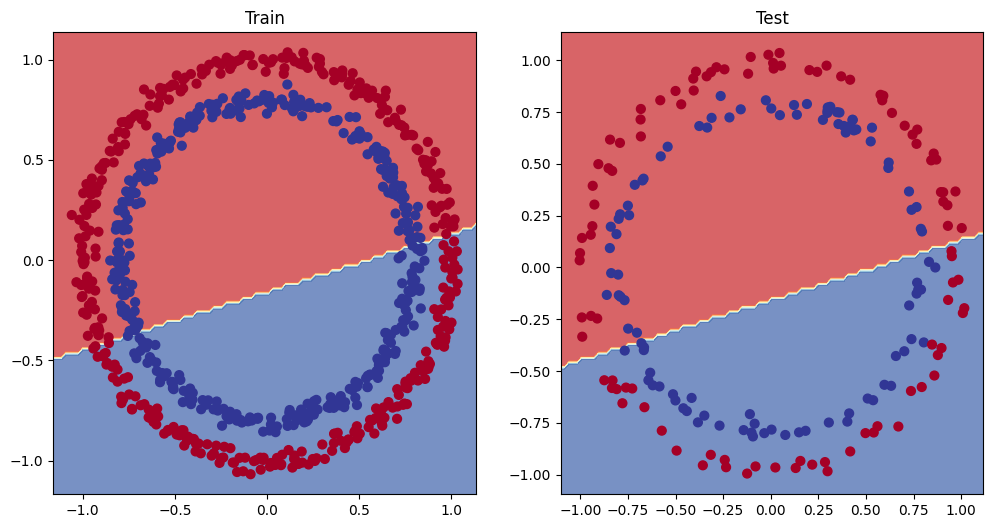

In [243]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)

## 5. Improving a model (from a model perspective)

Let's try to fix our model's underfitting problem. 

In [244]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model, more hidden units is often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |
| **Use transfer learning** | Take a pretrained model from a problem domain similar to yours and adjust it to your own problem. We cover transfer learning in [notebook 06](https://www.learnpytorch.io/06_pytorch_transfer_learning/). |

In [245]:
model_0.state_dict()


OrderedDict([('0.weight',
              tensor([[-0.3222, -0.5275],
                      [ 0.3908,  0.5786],
                      [-0.5819,  0.0116],
                      [ 0.2697, -0.1832],
                      [-0.1540, -0.4876]])),
             ('0.bias', tensor([-0.3454, -0.6334, -0.0162,  0.4120,  0.3381])),
             ('1.weight',
              tensor([[ 0.1755, -0.1197, -0.0678,  0.3374, -0.1284]])),
             ('1.bias', tensor([-0.1375]))])

In [246]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

This time we'll train for longer (`epochs=1000` vs `epochs=100`) and see if it improves our model. 

In [247]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(x_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69378, Accuracy: 52.75% | Test loss: 0.69809, Test acc: 46.50%
Epoch: 100 | Loss: 0.69308, Accuracy: 51.50% | Test loss: 0.69608, Test acc: 46.50%
Epoch: 200 | Loss: 0.69301, Accuracy: 51.12% | Test loss: 0.69538, Test acc: 45.50%
Epoch: 300 | Loss: 0.69299, Accuracy: 51.00% | Test loss: 0.69504, Test acc: 45.50%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.25% | Test loss: 0.69487, Test acc: 45.50%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.25% | Test loss: 0.69478, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69473, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69471, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69469, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69469, Test acc: 46.00%


In [248]:
print("hello")

hello


## 6. The missing piece: non-linearity 

### 6.1 Recreating non-linear data (red and blue circles)

First, let's recreate the data to start off fresh. We'll use the same setup as before. 

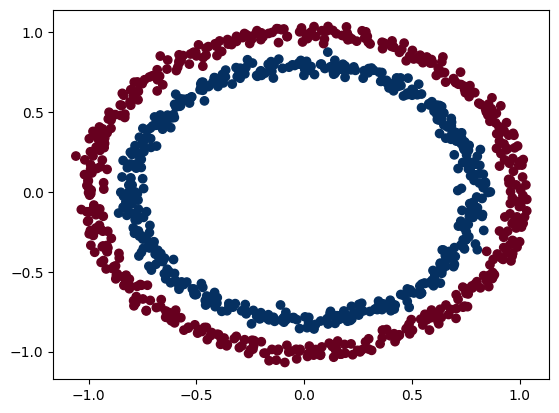

In [249]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [250]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity 

In [251]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=10)
        self.layer_4 = nn.Linear(in_features=10, out_features =1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [252]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.05)

### 6.3 Training a model with non-linearity

In [253]:
# Fit the model
torch.manual_seed(42)
epochs = 5000


# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69815, Accuracy: 50.00% | Test Loss: 0.69767, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69275, Accuracy: 50.00% | Test Loss: 0.69237, Test Accuracy: 50.00%
Epoch: 200 | Loss: 0.69235, Accuracy: 52.88% | Test Loss: 0.69194, Test Accuracy: 52.50%
Epoch: 300 | Loss: 0.69218, Accuracy: 51.62% | Test Loss: 0.69172, Test Accuracy: 53.00%
Epoch: 400 | Loss: 0.69199, Accuracy: 52.00% | Test Loss: 0.69149, Test Accuracy: 53.00%
Epoch: 500 | Loss: 0.69178, Accuracy: 52.62% | Test Loss: 0.69121, Test Accuracy: 53.00%
Epoch: 600 | Loss: 0.69151, Accuracy: 52.38% | Test Loss: 0.69089, Test Accuracy: 53.00%
Epoch: 700 | Loss: 0.69120, Accuracy: 52.88% | Test Loss: 0.69052, Test Accuracy: 53.50%
Epoch: 800 | Loss: 0.69083, Accuracy: 52.50% | Test Loss: 0.69006, Test Accuracy: 53.50%
Epoch: 900 | Loss: 0.69038, Accuracy: 52.88% | Test Loss: 0.68950, Test Accuracy: 54.50%
Epoch: 1000 | Loss: 0.68982, Accuracy: 52.75% | Test Loss: 0.68883, Test Accuracy: 54.00%
Epoch: 1100 | Loss: 0.

### 6.4 Evaluating a model trained with non-linear activation functions

In [254]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

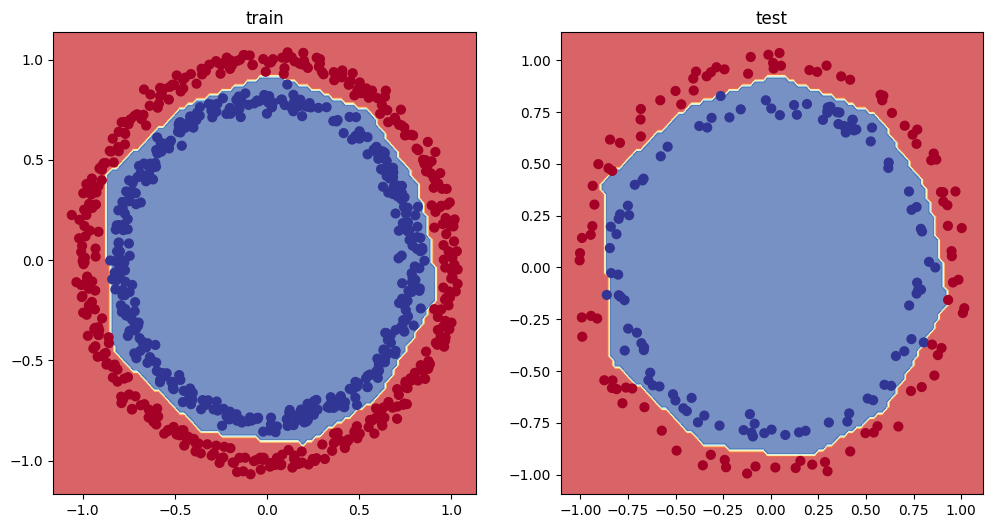

In [255]:
#plot decision boundaries
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3, x_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3, x_test, y_test)

In [257]:
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

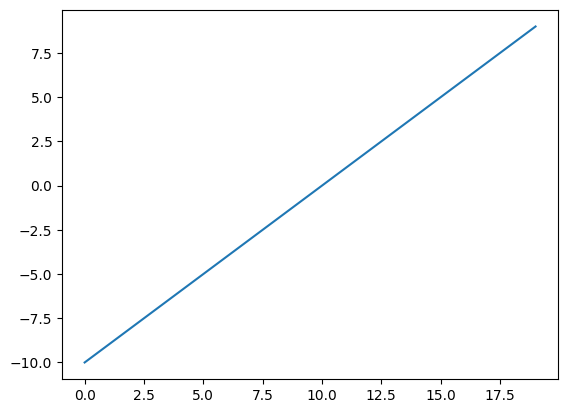

In [259]:
# Visualize the toy tensor
plt.plot(A);

In [258]:
# Create ReLU function by hand 
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

The sigmoid function formula goes like so:

$$ out_i = \frac{1}{1+e^{-input_i}} $$ 

Or using $x$ as input:

$$ S(x) = \frac{1}{1+e^{-x_i}} $$

Let's build a function to replicate the sigmoid function with PyTorch.

In [260]:
# Create a custom sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# Test custom sigmoid on toy tensor
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

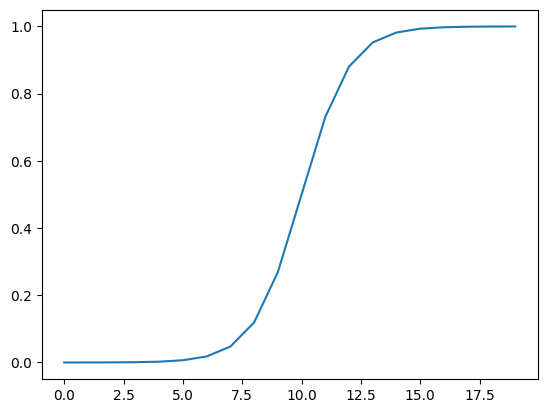

In [261]:
# Plot sigmoid activated toy tensor
plt.plot(sigmoid(A));